In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
img = face_recognition.load_image_file("新垣結衣.jpg")
locs = face_recognition.face_locations(img, model="cnn")
encodings = face_recognition.face_encodings(img, known_face_locations=locs)
print("sample:", encodings[0])
plt.imshow(img)

In [ ]:
import glob
import numpy as np
subs = ["jpg", "jpeg", "png"]
totalfn = []
for sub in subs:
    totalfn = totalfn + glob.glob("*.{}".format(sub)) 
    totalfn = totalfn + glob.glob("*.{}".format(sub.upper()))
names = list(map(lambda x:x.split(".")[0], totalfn))
def load(fn):
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    return en
encodings = list(map(load, totalfn))
print(names)
print(encodings)

輸入網址:https://imgs.cwgv.com.tw/pic/2017-10-13-1507890348.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 蔡英文 的距離: 0.774337876956943
跟 新垣結衣 的距離: 0.772801620815648
跟 韓國瑜 的距離: 0.8059690456321906
跟 周杰倫 的距離: 0.8516137924684223
最小距離: 新垣結衣
------------------------------


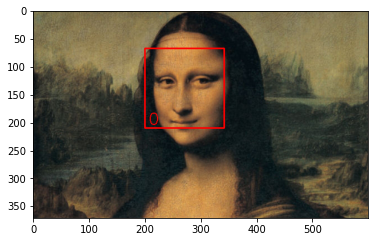

In [23]:
import requests
import cv2
headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"
}
url = input("輸入網址:")
response = requests.get(url, 
                        headers=headers, 
                        stream=True, 
                        verify=False)
img = face_recognition.load_image_file(response.raw)
locs = face_recognition.face_locations(img, model="cnn")
ens = face_recognition.face_encodings(img, known_face_locations=locs)
count = 0
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 2)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(img, str(count), (left + 6, bottom - 6), font, 1.0, (255, 0, 0), 1)
    distances = face_recognition.face_distance(en, encodings)
    for n, d in zip(names, distances):
        print("跟", n, "的距離:", d)
    ans = names[distances.argmin()]
    print("最小距離:", ans)
    count = count + 1
    print("-" * 30)
plt.imshow(img)